# Part1  Learn Minions


![Image of Yaktocat](https://cdn.vox-cdn.com/uploads/chorus_asset/file/7882945/bob.jpg)

The Minions are small, yellow henchmen, shaped like pill capsules. They are depicted as being roughly one-third to one-half the height of humans. They have one or two eyes, and their eyes are almost always brown (except for Bob, who has one green and one brown eye). They have no discernable noses but seem capable of smelling, as they are shown smelling fruit or being affected by the Fart Gun. They are also shown without ears but can hear and respond to sounds. Most minions appear either bald or with a few wispy strands of black hair on their heads. Their clothing consists of blue overalls emblazoned with Gru's logo, black rubber gloves, shoes, and goggles. They mostly speak incomprehensible gibberish, which is partly derived from other languages, including Bahasa Indonesia, French, English, Italian, Spanish, and Hindi. Although seemingly nonsensical, the English-sounding dialogue is dubbed differently for every country, in order to make the sounds somewhat recognizable.They have common English-language names, such as Kevin, Stuart and Bob (the lead trio in Minions).

In the first project, we use tensorflow to let the nueral network learn the images.

Import all the libraries.cv2 is used to working with the images.

In [ ]:
#from skimage.data import astronaut
from scipy.misc import imresize
import cv2
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.image as mpimg 
plt.style.use('ggplot')


Now we've got most of the tools we'll need to perform much more complicated tasks. We'll first explore a fun application: painting an image. 

Let's first get an image that we'll try to teach a neural network to paint.

Check my directory.

In [2]:
os.getcwd()

'C:\\Users\\珍'

## Import Data

Use mpig.imread to load the data. In this part, we use Stuart's image to train our neural network. Put the image at path: User/username/data.

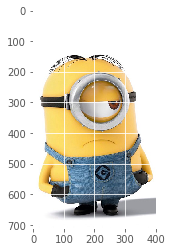

In [3]:
img = mpimg.imread('./data/ST.jpeg')
plt.imshow(img)

Instead of using a network to go from some x position to the value of a sine wave, what we're going to do instead teach a network to go from the location on an image frame to a particular color. So given any position in an image, the network will need to learn what color to paint.

In [4]:
# We'll first collect all the positions in the image in our list, xs
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape

((284000, 2), (284000, 3))

What we're going to do is use regression to predict the value of a pixel given its (row, col) position. So the input to our network is X = (row, col) value. And the output of the network is Y = (r, g, b).

We can get our original image back by reshaping the colors back into the original image shape:

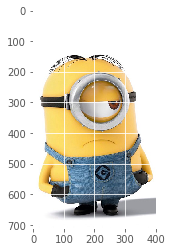

In [5]:
plt.imshow(ys.reshape(img.shape))

Tensorflow can handle any number of values we give it, so this is actually a pretty simple modification to the network definition. We'll stick with the convention of using the variable Xto denote the input to the network, and Y to denote the output of the network.

In [6]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

Define the liner function to handle with the input and output.

In [8]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

## Building the Network
For our model, we'll make our first deep neural network! Instead of having a single fully connected layer, we'll have many layers. We'll make use of a for loop to simplify the creation of the network. The network will look like:

In [9]:
n_neurons = [2, 64, 64, 64, 64, 64, 64, 3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

The following function will measure the absolute distance.

In [10]:

# this function will measure the absolute distance, also known as the l1-norm
def distance(p1, p2):
    return tf.abs(p1 - p2)


The rest of this code is pretty much the same as what we've done in previous networks. We setup our cost. Except before, we only ever had 1 feature. In this network, our output is 3 vaules, r, g, b.


## Training
In order to better measure the error, we'll sum the error across all 3 values. There are many ways we could have approached this which we'll get into in later sessions.

In [11]:
cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

We're going to use a different type of optimizer called AdamOptimizer which in general will work better than the original GradientDescentOptimizer. It's pretty similar, except it has some tricks to help with gradient descent. Getting into the details of it is beyond the scope of what we have time for. So long as you're not working with sequential data or building a recurrent network, it will probably always work better than just using GradientDescent.

In [12]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

Import libraries:sys,numpy and PIL

In [13]:
import sys
import numpy
from PIL import Image

The rest of the code is pretty much the same. We create the optimizer exactly the same way, by giving it our cost. And then create a session to iterate over chunks of our training data. Every 20 iterations, we're going to draw the predicted image by evaluating the predicted image tensor, Y_pred, and giving it every location in the image to predict, the xs array. This will return us the predicted color values for those locations. This process will take awhile!

0 99.84807


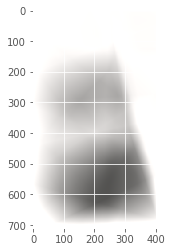

1 100.05478


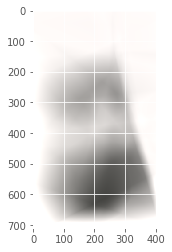

2 90.67666


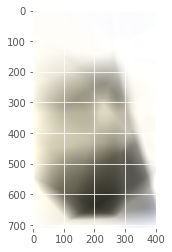

3 66.68779


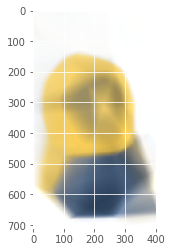

4 59.54766


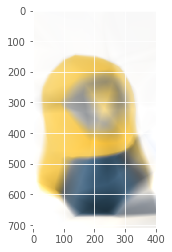

5 48.627995


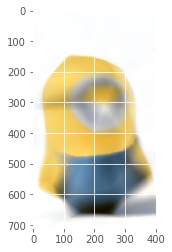

6 48.013294


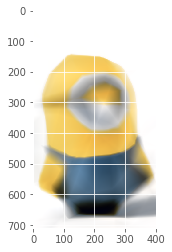

7 42.564396


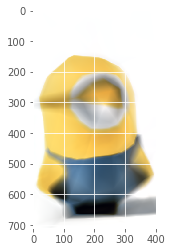

8 39.35097


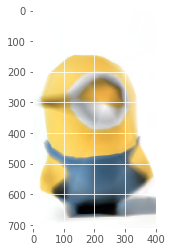

9 38.5365


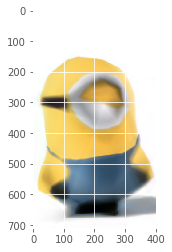

10 38.124027


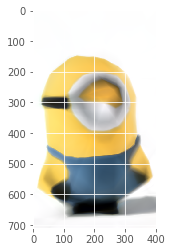

11 33.736485


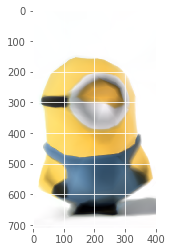

12 34.212505


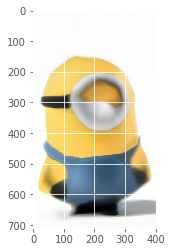

13 35.236


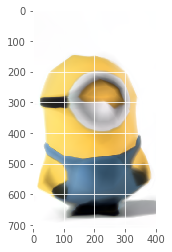

14 34.68545


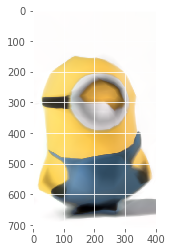

15 32.78035


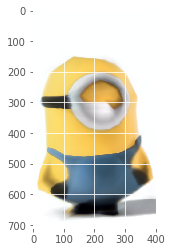

16 32.91747


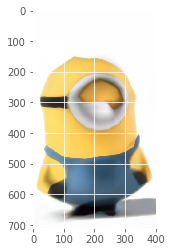

17 33.114037


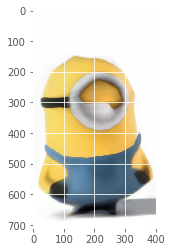

18 32.648556


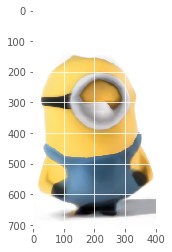

19 31.166464


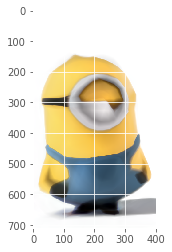

20 30.983358


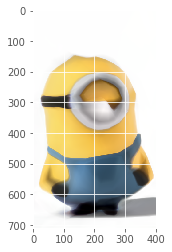

21 30.219334


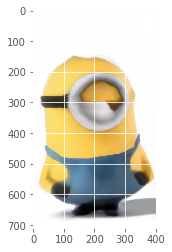

22 32.29488


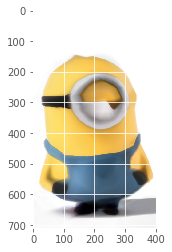

23 32.83185


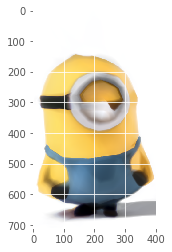

24 29.088795


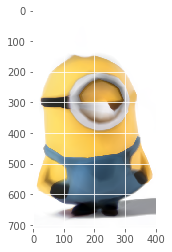

25 28.639278


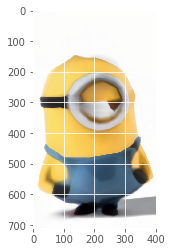

26 28.861366


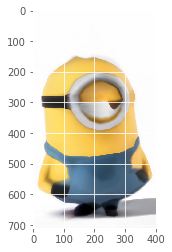

27 28.239204


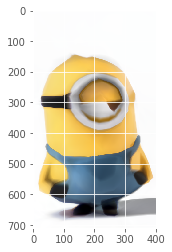

28 26.37231


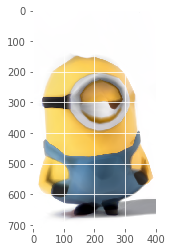

29 26.838886


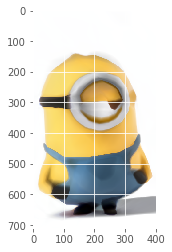

30 26.618862


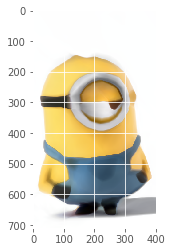

31 25.19127


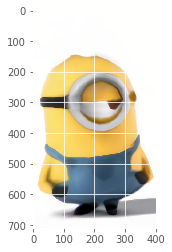

32 27.013556


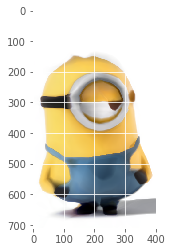

33 26.356619


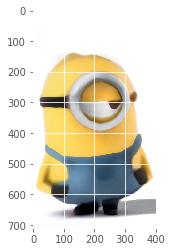

34 26.713123


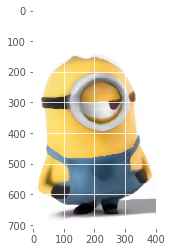

35 25.95748


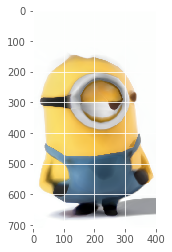

36 26.497887


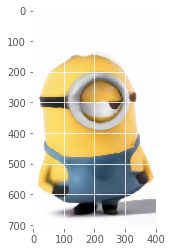

37 24.156422


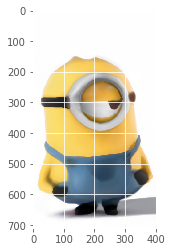

38 25.039223


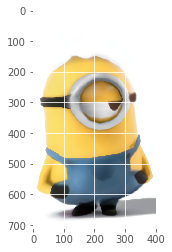

39 23.938196


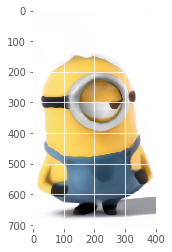

40 25.548306


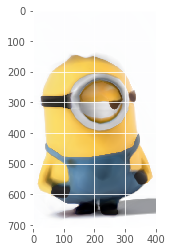

41 25.58818


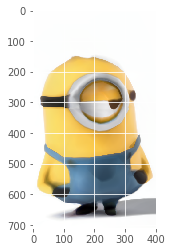

42 24.947577


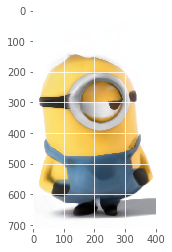

43 26.39398


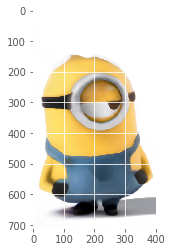

44 24.763338


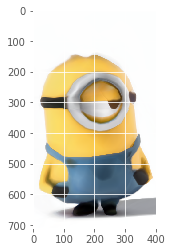

45 25.991215


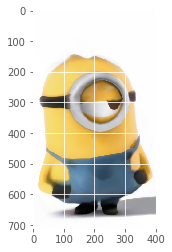

46 23.930025


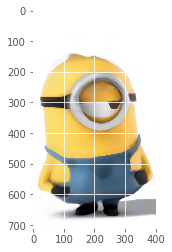

47 22.545885


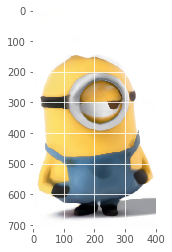

48 23.489168


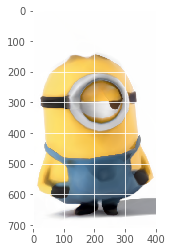

49 23.234348


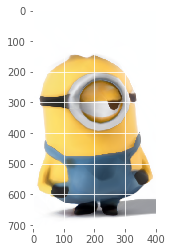

In [15]:
n_iterations = 50
batch_size = 50
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)


        if (it_i + 1) % 1 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            cv2.imwrite('image_'+str(it_i)+'.png',cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
            plt.imshow(img)
            plt.show()
            #plt.savefig('image_'+str(it_i)+'.png')




Wow, the result is amazing, we can see how fast the neural network learn. After several experiments, we also find that in this project, increasing the iterations number will lead to better result. If we provide the picture with more pixles, the result will be even better, that is because we are providing more avaliable data for the neural network.

Now that we have the result, let us use moviepy to generate the .mp4 movie to see how the neural network learn form the minion!

In [16]:
import math

In [17]:
import glob
import moviepy.editor as mpy

gif_name = 'outputName'
fps = 1000
file_list = glob.glob('*.png') # Get all the pngs in the current directory
print(file_list)
list.sort(file_list, key=lambda x: int(x.split('_')[1].split('.png')[0])) # Sort the images by #, this may need to be tweaked for your use case
print(file_list)
clip = mpy.ImageSequenceClip(file_list, fps=fps)

clip_resized = clip.resize(height=360)

clip_resized.write_videofile("movie_resized.mp4")
clip_resized.fl_time(lambda t: t+ math.sin(t), apply_to=['movie_resized.mp4'])
#clip.write_gif('{}.gif'.format(gif_name), fps=fps)

['image_0.png', 'image_1.png', 'image_10.png', 'image_11.png', 'image_12.png', 'image_13.png', 'image_14.png', 'image_15.png', 'image_16.png', 'image_17.png', 'image_18.png', 'image_19.png', 'image_2.png', 'image_20.png', 'image_21.png', 'image_22.png', 'image_23.png', 'image_24.png', 'image_25.png', 'image_26.png', 'image_27.png', 'image_28.png', 'image_29.png', 'image_3.png', 'image_30.png', 'image_31.png', 'image_32.png', 'image_33.png', 'image_34.png', 'image_35.png', 'image_36.png', 'image_37.png', 'image_38.png', 'image_39.png', 'image_4.png', 'image_40.png', 'image_41.png', 'image_42.png', 'image_43.png', 'image_44.png', 'image_45.png', 'image_46.png', 'image_47.png', 'image_48.png', 'image_49.png', 'image_5.png', 'image_6.png', 'image_7.png', 'image_8.png', 'image_9.png']
['image_0.png', 'image_1.png', 'image_2.png', 'image_3.png', 'image_4.png', 'image_5.png', 'image_6.png', 'image_7.png', 'image_8.png', 'image_9.png', 'image_10.png', 'image_11.png', 'image_12.png', 'image_13.

100%|██████████████████████████████████████████| 51/51 [00:01<00:00, 27.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: movie_resized.mp4 



go to the user/username floder, now we can see the generated movie. Look how it leans! 

## References:

[1]https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html

[2]https://www.kadenze.com/courses/creative-applications-of-deep-learning-with-tensorflow-iv

[3]https://www.tensorflow.org/